In [2]:
import numpy as np 
import pandas as pd 

# visualization
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

### Data Import and Examination

#### Initial Examination

In [4]:
# Prof provided the train test splitting code, this csv has already went through that
# The first 22500 rows will be train set and the last 7500 rows are test set
df_card = pd.read_csv('/Users/patricia/Desktop/Y2S1/BT2103/Group Project/card_splitted.csv',skiprows=0)

We first examine some sample from the dataset

In [5]:
df_card.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Then we take a more in-depth look at the data

In [6]:
df_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

#### Data Pre-processing and Inspection

We observe several issues with the data:

1. Weird labels
2. Null Values & Repeated Values?
3. Outliers in the data?
4. Feature selection
5. Encoding the categorical variables?
6. SMOTE to deal with imbalanced classes
7. Linear Seperability check

In [7]:
# 1. Data cleaning
# See all the counts: barplot can be used in report

#df_card.SEX.value_counts() #ok
#df_card.EDUCATION.value_counts() #0,5,6 meaning???
#df_card.MARRIAGE.value_counts() # 0 meaning???
#df_card.AGE.value_counts() #ok
#df_card.PAY_0.value_counts() # what does -1,-2,0 means??? 
#df_card.PAY_2.value_counts() # same as above


fil = (df_card.EDUCATION == 5) | (df_card.EDUCATION == 6) | (df_card.EDUCATION == 0)
df_card.loc[fil, 'EDUCATION'] = 4
#df_card.EDUCATION.value_counts()

df_card.loc[df_card.MARRIAGE == 0, 'MARRIAGE'] = 3
#df_card.MARRIAGE.value_counts()

fil = (df_card.PAY_0 == -2) | (df_card.PAY_0 == -1) | (df_card.PAY_0 == 0)
df_card.loc[fil, 'PAY_0'] = 0

fil = (df_card.PAY_2 == -2) | (df_card.PAY_2 == -1) | (df_card.PAY_2 == 0)
df_card.loc[fil, 'PAY_2'] = 0

fil = (df_card.PAY_3 == -2) | (df_card.PAY_3 == -1) | (df_card.PAY_3 == 0)
df_card.loc[fil, 'PAY_3'] = 0

fil = (df_card.PAY_4 == -2) | (df_card.PAY_4 == -1) | (df_card.PAY_4 == 0)
df_card.loc[fil, 'PAY_4'] = 0

fil = (df_card.PAY_5 == -2) | (df_card.PAY_5 == -1) | (df_card.PAY_5 == 0)
df_card.loc[fil, 'PAY_5'] = 0

fil = (df_card.PAY_6 == -2) | (df_card.PAY_6 == -1) | (df_card.PAY_6 == 0)
df_card.loc[fil, 'PAY_6'] = 0

30000
False


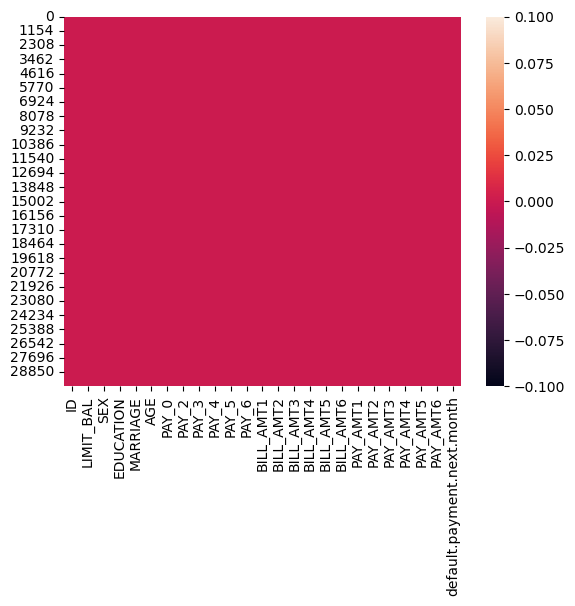

In [8]:
# 2. Repeated and missing values

#check duplicate
print(df_card['ID'].nunique()) #no duplicates

#check NA values
import seaborn as sns
df_card_fillna = df_card.copy()
sns.heatmap(df_card_fillna.isnull())

print(df_card.isnull().values.any()) # cool, no NA 


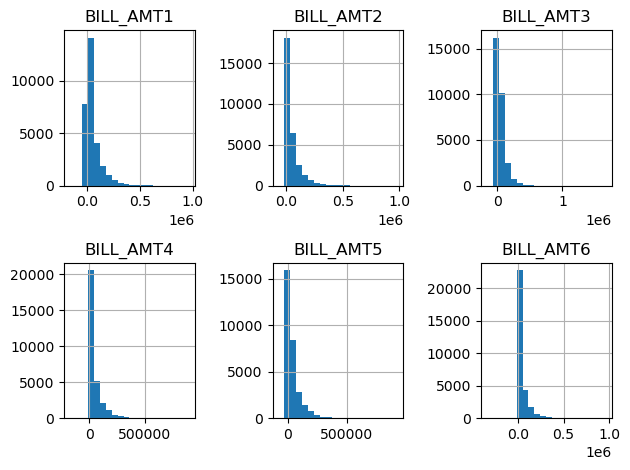

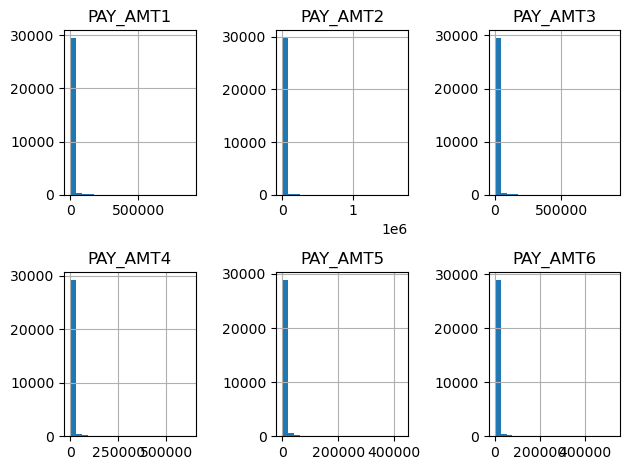

In [9]:
# 3. Outliers check
# only need to check those BILL_AMT and PAY_AMT

# helper method to plot # ugly plot, we can consider use R to plot
def draw_histograms(df, variables, n_rows, n_cols, n_bins):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=n_bins,ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

# Not very nice plot, should use R. Also plot limit_bal:
bills = df_card[['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]
draw_histograms(bills, bills.columns, 2, 3, 20)
pay = df_card[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
draw_histograms(pay, pay.columns, 2, 3, 20)
# Although being statistically outliers, the values are still within sensible range
# (They are just normal rich clients)
# So no need to remove them

# Scaling
# Theoretically Scaling is not necessary as most of our models will figure out the weight eventually,
# But scaling often helps in certain algorithm, for example regression, due to some precision problem in matrix calculation
# Should we just do it to show we have learned stuff?
from sklearn.preprocessing import MinMaxScaler
df_card_scaled = df_card.copy()
mms = MinMaxScaler()
df_card_scaled[['LIMIT_BAL','BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6','PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']] = pd.DataFrame(mms.fit_transform(df_card_scaled[['LIMIT_BAL','BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6','PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]))


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


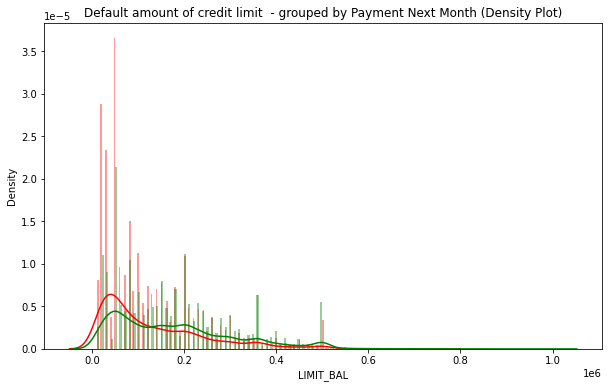

In [ ]:
class_0 = df_card.loc[df_card['default.payment.next.month'] == 0]["LIMIT_BAL"]
class_1 = df_card.loc[df_card['default.payment.next.month'] == 1]["LIMIT_BAL"]
plt.figure(figsize = (10,6))
plt.title('Default amount of credit limit  - grouped by Payment Next Month (Density Plot)')
sns.set_color_codes("pastel")
sns.distplot(class_1,kde=True,bins=200, color="red")
sns.distplot(class_0,kde=True,bins=200, color="green")
plt.show()

/Users/patricia/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/patricia/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


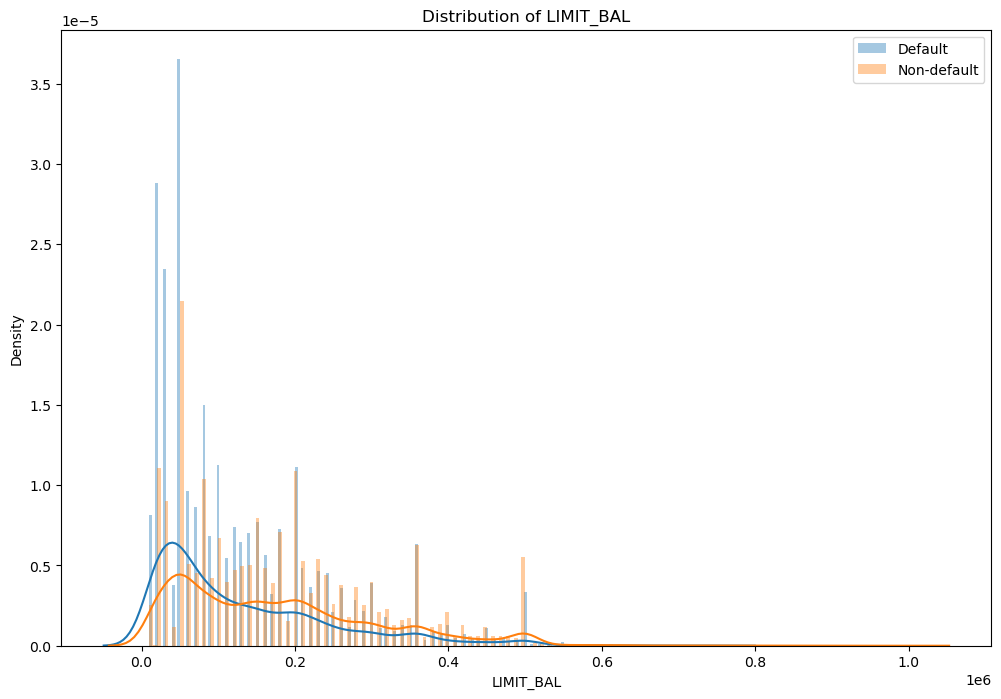

In [10]:
class_0 = df_card.loc[df_card['default.payment.next.month'] == 0]["LIMIT_BAL"]
class_1 = df_card.loc[df_card['default.payment.next.month'] == 1]["LIMIT_BAL"]
f, ax = plt.subplots(1, 1,figsize = (12,8))
plt.title('Distribution of LIMIT_BAL')
sns.distplot(class_1,kde=True,bins=200,ax=ax, label = "Default")
sns.distplot(class_0,kde=True,bins=200,ax=ax, label = "Non-default")
ax.legend()

In [12]:
df_card[df_card.LIMIT_BAL > 700000][['LIMIT_BAL', 'PAY_2', 'PAY_3', 'BILL_AMT3', 
                          'PAY_AMT2', 'BILL_AMT2', 'default.payment.next.month']]

,LIMIT_BAL,PAY_2,PAY_3,BILL_AMT3,PAY_AMT2,BILL_AMT2,default.payment.next.month
1642,1000000,0,0,535020,50723,983931,0
2527,710000,0,0,0,0,0,1
2769,750000,0,0,74635,74640,99628,0
2997,710000,0,0,34854,3696,31719,0
3427,750000,0,0,3329,3691,15344,0
4412,710000,0,0,940,944,16849,0
7577,750000,0,0,92767,2330,163441,0
7971,720000,0,0,105582,8043,112933,0
9840,750000,0,0,401003,401003,9655,0
11158,800000,0,0,64535,64657,5552,0


<AxesSubplot:>

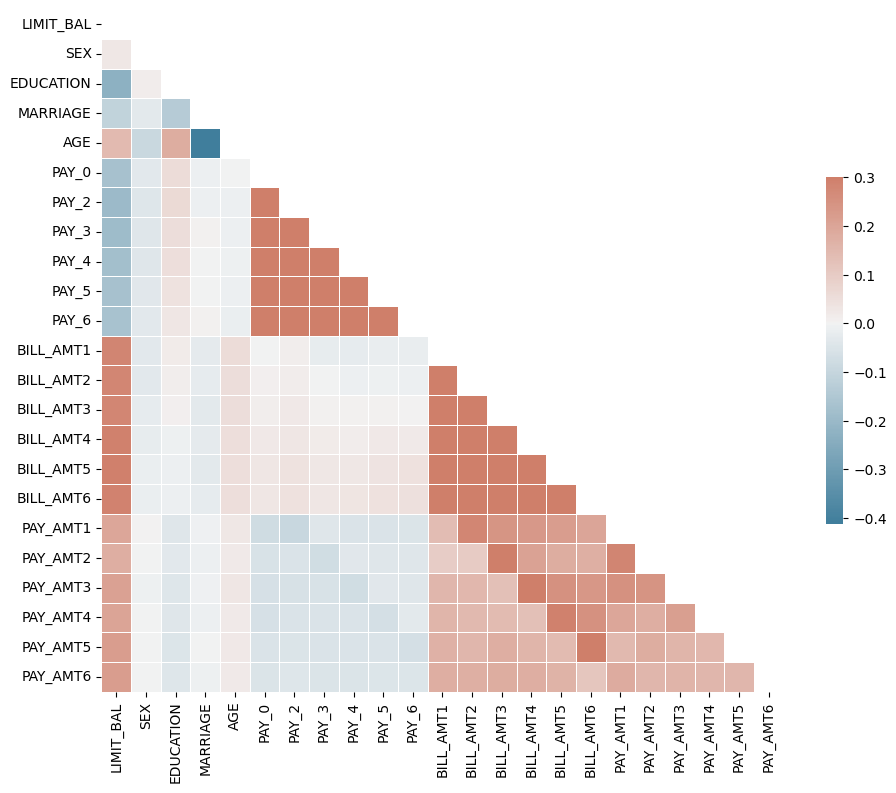

In [13]:
# 4. Feature Selections
# Method 1. correlation plot

# I am using the original value (before scale) to do 1)correlation & 2)chi-square & 3)info gain. Because:
# 1) Correlation will remain the same so it does not matter
# 2) Scaled value is very small it will bias our chi-square estimates
# 3) Info gain also remains the same
X = df_card.iloc[:,1:-1] # all the variables
y = df_card.iloc[:,-1] # labels
#X.columns

import matplotlib.pyplot as plt
import seaborn as sns

corr = X.corr()
#print(corr)
#Reduce to triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#Highest is only around 0.3, do not remove first

(array([7.10658442e+07, 7.14636693e+00, 1.03370155e+01, 3.98213116e+00,
       1.38584400e+01, 7.62888231e+03, 6.44625798e+03, 5.07927168e+03,
       4.86160750e+03, 4.74706792e+03, 4.04938834e+03, 1.23905340e+06,
       6.29576010e+05, 6.03923839e+05, 2.92176003e+05, 1.25354899e+05,
       7.17824533e+04, 7.72884740e+06, 9.22947597e+06, 5.63096908e+06,
       4.92666725e+06, 4.43348410e+06, 5.14163850e+06]), array([0.        , 0.0075116 , 0.00130389, 0.04598535, 0.00019711,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ]))


<AxesSubplot:>

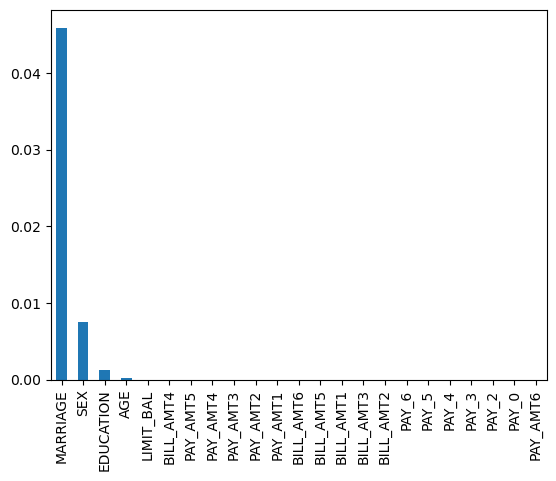

In [14]:
# 4. Feature Selections
# Method 2. Chi-square

from sklearn.feature_selection import chi2
chi_scores = chi2(np.clip(X,0,10000000),y) # clip is to ensure no negative values
print(chi_scores)

p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()


LIMIT_BAL    0.013710
SEX          0.001693
EDUCATION    0.006366
MARRIAGE     0.004965
AGE          0.000400
PAY_0        0.077651
PAY_2        0.050492
PAY_3        0.037682
PAY_4        0.036078
PAY_5        0.028263
PAY_6        0.025529
BILL_AMT1    0.010993
BILL_AMT2    0.006273
BILL_AMT3    0.008142
BILL_AMT4    0.003333
BILL_AMT5    0.005264
BILL_AMT6    0.005457
PAY_AMT1     0.022997
PAY_AMT2     0.014094
PAY_AMT3     0.020713
PAY_AMT4     0.014922
PAY_AMT5     0.013132
PAY_AMT6     0.010223
dtype: float64

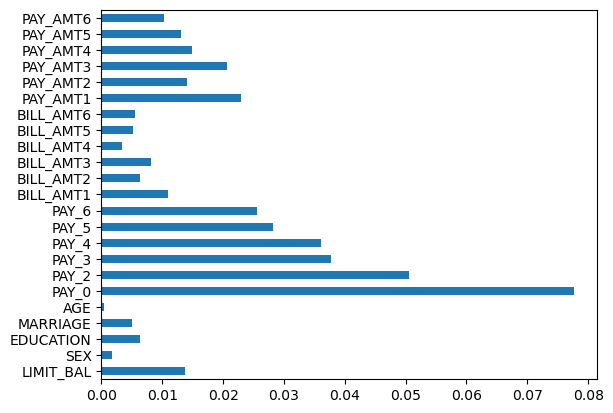

In [15]:
# 4. Feature Selections
# Method 3. Mutual Info Classifier. Estimates mutual information among the features and look at the information gain by each of the variables.
from sklearn.feature_selection import mutual_info_classif
IG = mutual_info_classif(X, y,random_state=42)
feature_IG = pd.Series(IG, df_card.columns[1:len(df_card.columns)-1])
feature_IG.plot(kind = 'barh')
feature_IG

# All have some info gain

### Conclusion for Feature selection:
I do not think we should remove any of them because we did not get significant information in any of the above method suggesting which feature is redundant.

And also, major reasons to do feature selection includes:
1) To reduce dimensionality to avoid "Curse of Dimensionality". But:
  1) we have sufficiently big size of data (30000, and even more through synthesis of data).
  2) models like random forest or logistic regression does not really get influenced much.
So we do not have to remove some of the features due to the above reasons.

2) Another reason for feature selection is to remove noise, but:

  1)Although age & marriage & sex does not appear to be very useful as shown by the packages, there are definitely important demographics to determine customer's behavior so we should not remove them.

  2)Also,Looking at all the "PAY_AMT"s, there would contain repeated information and thus we could consider to remove some of them. But it can be also seen that the correlation between them turns out to be low. Meaning each column does also include new useful information. Also, we can argue that it such record over different time provides trends of a person's economic situation and one's spending pattern. Thus all is useful information.
Same goes for all the "BILL_AMT"s & "PAY"s.

In [20]:
# 5. Encoding
# I do not think it is going to be useful because of the ordinal nature of the categorical variables
# Liek for education, increasing number already denotes lowering education level
# For marriage and sex, it is just two levels (with one unknown), so it is also not necessary to one hot encode it.
# Note one hot encoding will introduce some redundancy but it should not be a problem

# But I will just do it
df_card_scaled_encoded = df_card_scaled.copy()

# encode SEX
one_hot = pd.get_dummies(df_card_scaled_encoded['SEX'])
one_hot.rename(columns={1: 'MALE', 2: 'FEMALE'}, inplace=True)

df_card_scaled_encoded = df_card_scaled_encoded.drop('SEX',axis = 1)
df_card_scaled_encoded = df_card_scaled_encoded.join(one_hot)
df_card_scaled_encoded = df_card_scaled_encoded.drop('MALE',axis = 1) # We only need 

# encode Marriage
one_hot = pd.get_dummies(df_card_scaled_encoded['MARRIAGE'])
one_hot.rename(columns={1: 'MARRIED', 2: 'SINGLE',3:'OTHERS'}, inplace=True)

df_card_scaled_encoded = df_card_scaled_encoded.drop('MARRIAGE',axis = 1)
df_card_scaled_encoded = df_card_scaled_encoded.join(one_hot)
df_card_scaled_encoded = df_card_scaled_encoded.drop('OTHERS',axis = 1)

# Remove those with high corr with each other:
df_card_scaled_encoded = df_card_scaled_encoded.drop('BILL_AMT2',axis = 1)
df_card_scaled_encoded = df_card_scaled_encoded.drop('BILL_AMT4',axis = 1)
df_card_scaled_encoded = df_card_scaled_encoded.drop('BILL_AMT6',axis = 1)
df_card_scaled_encoded = df_card_scaled_encoded.drop('PAY_5',axis = 1)
df_card_scaled_encoded = df_card_scaled_encoded.drop('PAY_3',axis = 1)


In [21]:
df_card_scaled_encoded

,ID,LIMIT_BAL,EDUCATION,AGE,PAY_0,PAY_2,PAY_4,PAY_6,BILL_AMT1,BILL_AMT3,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,FEMALE,MARRIED,SINGLE
0,1,0.010101,2,24,2,2,0,0,0.149982,0.086723,...,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000,1,1,1,0
1,2,0.111111,2,26,0,2,0,2,0.148892,0.087817,...,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783,1,1,0,1
2,3,0.080808,2,34,0,0,0,0,0.172392,0.093789,...,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458,0,1,0,1
3,4,0.040404,2,37,0,0,0,0,0.188100,0.113407,...,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892,0,1,1,0
4,5,0.040404,2,57,0,0,0,0,0.154144,0.106020,...,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,4218,0.040404,2,33,1,2,2,2,0.182055,0.108506,...,0.002404,0.000000,0.003794,0.000000,0.018287,0.000000,1,0,0,1
29996,25066,0.232323,3,50,0,0,0,0,0.270609,0.157924,...,0.005442,0.002893,0.005617,0.006770,0.010571,0.009475,0,0,1,0
29997,687,0.010101,3,41,0,0,0,0,0.147209,0.086747,...,0.000000,0.000435,0.000335,0.001610,0.001172,0.001892,1,1,1,0
29998,3301,0.020202,3,41,1,2,0,0,0.172815,0.102359,...,0.000000,0.001187,0.002455,0.000000,0.002579,0.002081,0,1,1,0


In [22]:
# 6. Imbalanced classes, so need to over / under sample
print(df_card_scaled_encoded['default.payment.next.month'].value_counts())
# Note that onyl 22% of the overall class is of class 1. (Meaning default)
# I would expect some model to predict all 0 and get a 78% accuracy. But this is obviously not useful!

# So we need to over sample / undersample our data
# undersample is usually not an option, and here becasue our data set is not that big, we would not want to do it either
# Normal oversampling technique (simply duplicating the minority class data) hurts the variability of the data badly so it is not favored.
# Thus we choose to use Synthetic Minority Oversampling Technique (SMOTE) to random generate minority class data points
  ### We can show a plot of what SMOTE is doing
# Some further considerations: 
# Research from Balgus & Lusa (2013) argues that adding synthesised data could lead to correlation and reduction in variability in the data.
# This in turn would severely affect the capacity of some models such as random forest



# split featues and label
#X = df_card.iloc[:,1:-1] # all the variables
#y = df_card.iloc[:,-1] # labels

# Important!!! Train test split first, then SMOTE
# Otherwise it will lead to data snooping and unreliable result
# The data I read in is already splitted using prof given code. So I will just split it based on index

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=1234)
X_train = df_card_scaled_encoded.iloc[0:22501,1:]
X_test = df_card_scaled_encoded.iloc[22500:30001,1:]
y_train = df_card_scaled_encoded.iloc[0:22501,-4]
y_test = df_card_scaled_encoded.iloc[22500:30001,-4]

del X_train['default.payment.next.month']
del X_test['default.payment.next.month']


# Now SMOTE
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=1)
np.random.seed(1)

X_train_balanced, y_train_balanced = oversample.fit_resample(X_train, y_train)
#X_test_balanced, y_test_balanced = oversample.fit_resample(X_test, y_test)

# Export to csv
smoteTrain = X_train_balanced.reset_index(drop=True).join(y_train_balanced)
smoteTrain.to_csv('/content/drive/MyDrive/BT2103/smoteTrain.csv', index=False)

#smoteTest = X_test_balanced.reset_index(drop=True).join(y_test_balanced)
#smoteTest.to_csv('/content/drive/MyDrive/BT2103/smoteTest.csv', index=False)

testSet = X_test.join(y_test)
testSet.to_csv('/content/drive/MyDrive/BT2103/testSet.csv', index=False)

0    23364
1     6636
Name: default.payment.next.month, dtype: int64


ModuleNotFoundError: No module named 'imblearn'

In [23]:
X_train_balanced.reset_index(drop=True).join(y_train_balanced)

NameError: name 'X_train_balanced' is not defined

We are done with all the data cleaning and processing.
Just one more thing. I would want to investigate the linear separability of the data. As it can be quite important in logistic regression.
I will use a linear SVM and T-SNE to see.

In [19]:
# Linear Separability Checks
# Method 2. TSNE

from sklearn.manifold import TSNE
from keras.datasets import mnist
from sklearn.datasets import load_iris
from numpy import reshape
import seaborn as sns
import pandas as pd  

# I only looked at the training set. We can look at the test set separately or combined
x = X_train_balanced
y = y_train_balanced
tsne = TSNE(n_components=2, verbose=1, random_state=42) # May take up to 5 mins.
z = tsne.fit_transform(x) 

df = pd.DataFrame()
df["y"] = y
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df).set(title="Iris data T-SNE projection") 

ModuleNotFoundError: No module named 'keras'

In [ ]:
# 7. Linear Separability Check
# Method 1. SVM

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.svm import SVC
clf_svm = SVC(random_state=1)
clf_svm.fit(X_train_balanced, y_train_balanced) #This may take up to 5 mins. It is normal. Somehow SVM from sklearn is very slow...

y_predict_balanced = clf_svm.predict(X_test)
print(sum(y_predict_balanced == y_test))
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict_balanced)))
print('Recall Score is {:.5}'.format(recall_score(y_test, y_predict_balanced)))
print('Precision Score is {:.5}'.format(precision_score(y_test, y_predict_balanced)))
print('F1 Score is {:.5}'.format(f1_score(y_test, y_predict_balanced)))

sns.set_style('white') 
class_names = ['0','1']

print(pd.DataFrame(confusion_matrix(y_test,y_predict))) # left is true label, bottom is predicted

### Conclusion for Linear Separability:
1. SVM yields an accuracy of 61%, suggesting its incapability to separate the data with a linear kernel. Bad accuracy also suggests that the linear separability of the data is very bad. I would expect logistic regression to perform very badly just looking at this.

2. TSNE method maps all the features into 2 principal features (kind of PCA) and allow us to visualize it. We can then clearly see that the classes is mixed up and hardly separable.